# Steady state

**Table of contents**<a id='toc0_'></a>    
- 1. [Baseline](#toc1_)    
- 2. [iMPC](#toc2_)    
- 3. [Interest rate sensitivity](#toc3_)    
- 4. [Jacobians](#toc4_)    
- 5. [Two-asset model](#toc5_)    
- 6. [Two-asset one-account model](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"

import numpy as np
import numba as nb 
nb.set_num_threads(4)

from IHANKModel import HANKModelClass, HANKModelClass_RA, HANKModelClass_HA2
import figs

## 1. <a id='toc1_'></a>[Baseline](#toc0_)

In [2]:
model_HANK = HANKModelClass()
model_HANK.load_est_par('HANK_est_par_best')
model_HANK.find_ss(do_print=False)

## 2. <a id='toc2_'></a>[iMPC](#toc0_)

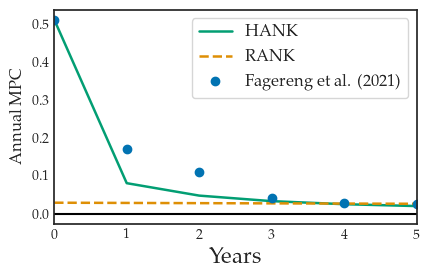

In [3]:
fig = figs.plot_MPCs(model_HANK) 
fig.savefig(f'plots\MPCs_ann.pdf')

## 3. <a id='toc3_'></a>[Interest rate sensitivity](#toc0_)

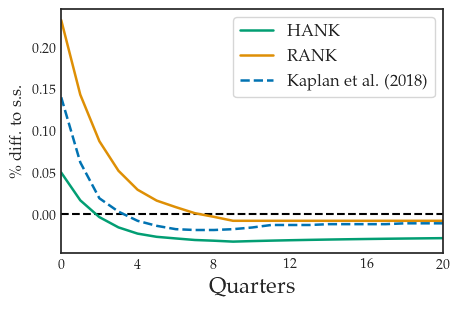

In [4]:
fig = figs.PE_MonPol_shock(model_HANK,do_KMV=True)
fig.savefig(f'plots/Rshock.pdf')

## 4. <a id='toc4_'></a>[Jacobians](#toc0_)

In [5]:
model_RANK = HANKModelClass_RA(par={'HH_type':'RA-IM'})
model_RANK.load_est_par('RANK_est_par_best')
model_RANK.find_ss(do_print=False)

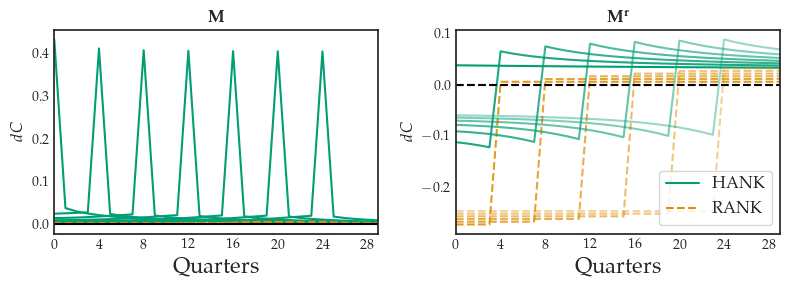

In [6]:
fig = figs.plot_jac_columns(model_RANK, model_HANK)
fig.savefig(f'plots/M_columns.pdf')

## 5. <a id='toc5_'></a>[Two-asset model](#toc0_)

In [7]:
model_HANK_2A = HANKModelClass_HA2(par={'HH_type':'HA-2A'})
model_HANK_2A.load_est_par('HANK_est_par_best')
model_HANK_2A.find_ss(do_print=False)
model_HANK_2A.save_x0s('HANK_2A_x0s')

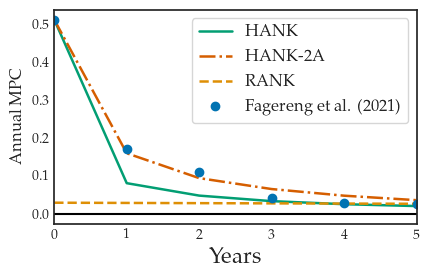

In [8]:
fig = figs.plot_MPCs(model_HANK,model_HANK_2A,'HANK','HANK-2A')
fig.savefig(f'plots\MPCs_ann_HANK_2A.pdf')

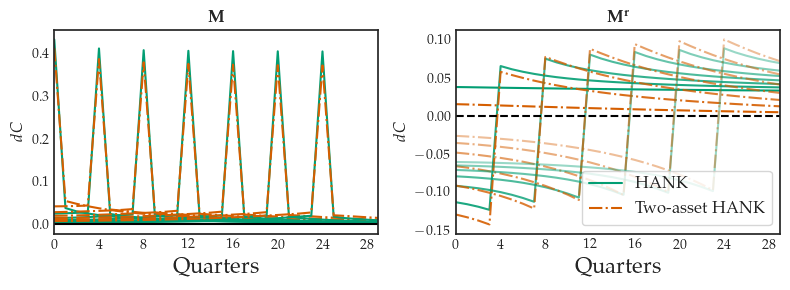

In [9]:
fig = figs.plot_jac_columns(None,model_HANK,model_HANK_2A)

## 6. <a id='toc6_'></a>[Two-asset one-account model](#toc0_)

In [10]:
model_HANK_I = HANKModelClass(par={'use1A_illiquid':True,'a_max':300})
model_HANK_I.load_est_par('HANK_est_par_best')
model_HANK_I.find_ss(do_print=False)

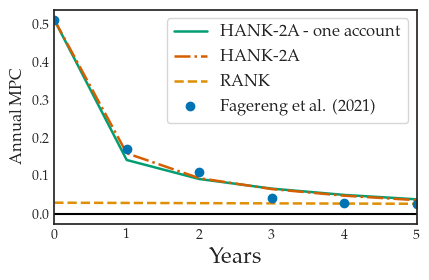

In [11]:
fig = figs.plot_MPCs(model_HANK_I,model_HANK_2A,'HANK-2A - one account','HANK-2A')